# Netflix Movies and TV Shows

## About Dataset

Netflix stands as a leading force in the realm of media and video streaming. With a staggering array of over 8,000 movies and TV shows accessible on their platform, as of mid-2021, their global subscriber count exceeds 200 million. This tabulated dataset comprehensively catalogues all offerings on Netflix, including vital details such as cast, directors, ratings, release year, duration, and more.

## Dataset Overview:

The Netflix Titles dataset is a comprehensive compilation of movies and TV shows available on Netflix, covering various aspects such as the title type, director, cast, country of production, release year, rating, duration, genres (listed in), and a brief description. This dataset is instrumental for analyzing trends in Netflix content, understanding genre popularity, and examining the distribution of content across different regions and time periods.

## Key Details:

Total Entries: The dataset contains 8,809 entries, each representing a unique movie or TV show.

Columns: There are 12 columns in the dataset:

`show_id`: A unique identifier for each title.

`type`: The category of the title, which is either 'Movie' or 'TV Show'.

`title`: The name of the movie or TV show.

`director`: The director(s) of the movie or TV show. (Contains null values for some entries, especially TV shows where this information might not be applicable.)

`cast`: The list of main actors/actresses in the title. (Some entries might not have this information.)

`country`: The country or countries where the movie or TV show was produced.

`date_added`: The date the title was added to Netflix.

`release_year`: The year the movie or TV show was originally released.

`rating`: The age rating of the title.

`duration`: The duration of the title, in minutes for movies and seasons for TV shows.

`listed_in`: The genres the title falls under.

`description`: A brief summary of the title.

## Potential Use Cases:
**Content Analysis**: This dataset can be used to perform detailed content analysis, such as genre popularity over time, distribution of content production across different countries, and trends in movie versus TV show production.

**Recommendation Systems**: For developers and data scientists working on recommendation systems, this dataset provides a rich source of metadata for content similarity and user preference modeling.

**Market Analysis**: Market researchers can utilize this dataset to analyze Netflix's content strategy, including their focus on international markets, genre diversification, and investment in original content.


### Problem set:
1. Data Exploration and Visualization: 

1.1 Explore the distribution of movie and TV show titles in the dataset.

1.2 Visualize the distribution of titles by release year. 

1.3 Plot a histogram of movie durations and TV show seasons.


2. Genre Analysis:

2.1 Identify the most popular genres on Netflix. 

2.2 Analyze the distribution of genres across different countries.


3. Rating Analysis:

3.1 Determine the distribution of ratings (e.g., PG-13, TV-MA) in the dataset.

3.2 Explore the relationship between ratings and genres.

3.3 Analyze the distribution of ratings by release year.


4. Country Analysis:

4.1 Identify the top countries producing content available on Netflix.

# Loading necessary packages

In [1]:
install.packages("trend")
install.packages("moments")


The downloaded binary packages are in
	/var/folders/yk/l5xpnq6130q_g10z20r7bb_80000gn/T//Rtmp8iBYzh/downloaded_packages

The downloaded binary packages are in
	/var/folders/yk/l5xpnq6130q_g10z20r7bb_80000gn/T//Rtmp8iBYzh/downloaded_packages


In [2]:
library(tidyverse)
library(data.table)
library(ggplot2)
library(lubridate)
library(stringr)
library(trend)
library(moments)
library(car)


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The followin

# Data preparation

#### 1. Reading dataset into `netflix` data.frame
#### 2. Data preparation:
   - selecting only columns that are being used during entire project
   - changing data code format to `UTF-8`
   - changing column's 'date_added' Date-format to `%B %d, %Y`
   - adding column 'year_added' by extracting year's values from `date_added` using 'year()' function
   - adding column 'month_added' by extracting month's values from `date_added` using 'month()' function
   - clearing column 'duration' from 'min', 'Seasons' and 'Season' strings and changing its type from `string` to `numeric`
   - clearing `rating` column from dataset where values don't correspond to expected value standard
#### 3. Analyzing structure of `netflix` dataset
#### 4. Summarizing `netflix` dataset

In [3]:
options(warn=-1, error = expression(NULL))

# Reading dataset into `netflix` data.frame
netflix <- fread(file = "netflix_titles.csv", select = c("show_id", "type", "title", "director", "cast", 
                                                                                            "country", "date_added", "release_year", "rating", 
                                                                                            "duration", "listed_in", "description"))

# 2. Data preparation:
# - selecting only columns that are being used during entire project
netflix <- netflix %>%
              select(show_id, type, title, country, date_added, release_year, rating, duration, listed_in) %>%
              filter(type != "" & title != "" & country != "" & release_year != "" & rating != "" & duration != "" & listed_in != "")

# - changing data code format to `UTF-8`
netflix <- netflix %>%
  mutate(across(everything(), 
				~iconv(., from = "UTF-8", to = "UTF-8", sub = "")),
		 		encoding = "UTF-8")

# - changing column's 'date_added' Date-format to `%B %d, %Y`
# - adding column 'year_added' by extracting year's values from `date_added` using 'year()' function
# - adding column 'month_added' by extracting month's values from `date_added` using 'month()' function
netflix$date_added <- as.Date(netflix$date_added, format = "%B %d, %Y")
netflix$year_added <- year(netflix$date_added)
netflix$month_added <- month(netflix$date_added)

# - clearing column 'duration' from 'min', 'Seasons' and 'Season' strings and changing its type from `string` to `numeric`
netflix <- netflix %>%
  mutate(duration = ifelse(type == "Movie",
                            str_replace_all(duration, " min", ""),
                            str_replace_all(duration, " Seasons|Season", "")),
          duration = as.numeric(duration)
          )

# - clearing `rating` column durationdata0t where values do
netflix <- netflix[!netflix$rating %in% c("66 min", "74 min", "84 min")]

netflix
# 3. Analyzing structure of `netflix` dataset
# 4. Summarizing `netflix` dataset
str(netflix)
summary(netflix)

show_id,type,title,country,date_added,release_year,rating,duration,listed_in,encoding,year_added,month_added
<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,UTF-8,2021,9
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries",UTF-8,2021,9
s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV Comedies",UTF-8,2021,9
s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",UTF-8,2021,9
s9,TV Show,The Great British Baking Show,United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",UTF-8,2021,9
s10,Movie,The Starling,United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",UTF-8,2021,9
s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",UTF-8,2021,9
s16,TV Show,Dear White People,United States,2021-09-22,2021,TV-MA,4,"TV Comedies, TV Dramas",UTF-8,2021,9
s18,TV Show,Falsa identidad,Mexico,2021-09-22,2020,TV-MA,2,"Crime TV Shows, Spanish-Language TV Shows, TV Dramas",UTF-8,2021,9


Classes 'data.table' and 'data.frame':	7972 obs. of  12 variables:
 $ show_id     : chr  "s1" "s2" "s5" "s8" ...
 $ type        : chr  "Movie" "TV Show" "TV Show" "Movie" ...
 $ title       : chr  "Dick Johnson Is Dead" "Blood & Water" "Kota Factory" "Sankofa" ...
 $ country     : chr  "United States" "South Africa" "India" "United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia" ...
 $ date_added  : Date, format: "2021-09-25" "2021-09-24" ...
 $ release_year: chr  "2020" "2021" "2021" "1993" ...
 $ rating      : chr  "PG-13" "TV-MA" "TV-MA" "TV-MA" ...
 $ duration    : num  90 2 2 125 9 104 127 4 2 5 ...
 $ listed_in   : chr  "Documentaries" "International TV Shows, TV Dramas, TV Mysteries" "International TV Shows, Romantic TV Shows, TV Comedies" "Dramas, Independent Movies, International Movies" ...
 $ encoding    : chr  "UTF-8" "UTF-8" "UTF-8" "UTF-8" ...
 $ year_added  : int  2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 ...
 $ month_added : int  9 9 9 9 9 9 9 9 

   show_id              type              title             country         
 Length:7972        Length:7972        Length:7972        Length:7972       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   date_added         release_year          rating             duration     
 Min.   :2008-01-01   Length:7972        Length:7972        Min.   :  1.00  
 1st Qu.:2018-03-30   Class :character   Class :character   1st Qu.:  3.00  
 Median :2019-06-21   Mode  :character   Mode  :character   Median : 90.00  
 Mean   :2019-04-25                                         Mean   : 72.25  

## 1. Data Exploration and Visualization:
### 1.1 Explore the distribution of movie and TV show titles in the dataset.

type,title_count,props
<chr>,<int>,<chr>
Movie,5688,71 %
TV Show,2284,28 %


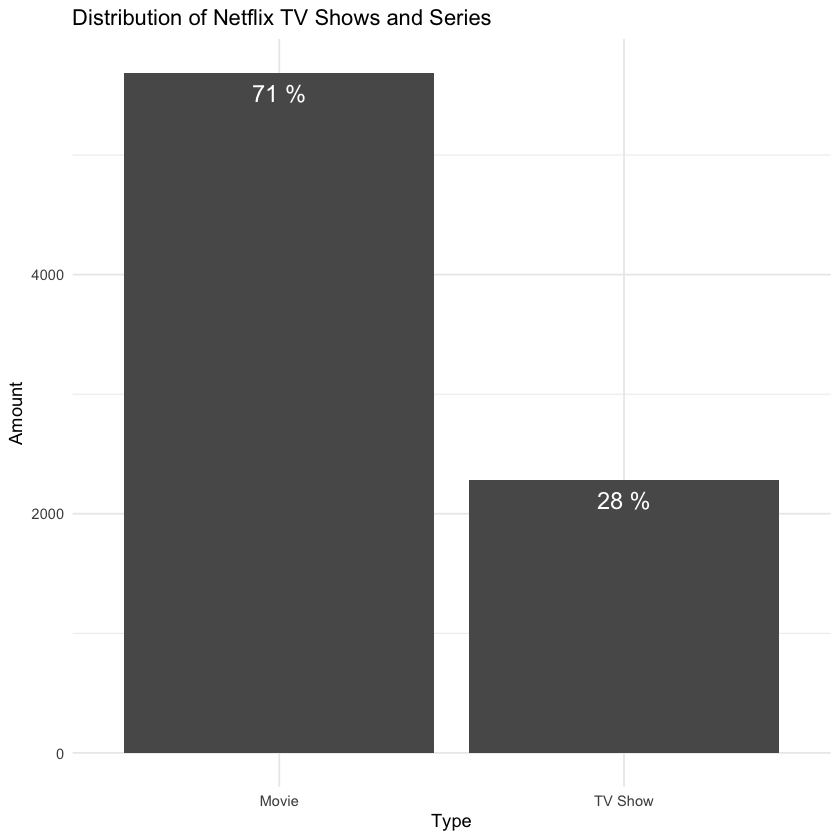

In [4]:
title_counts <- netflix %>%
                    group_by(type) %>%
                    summarise(title_count = n(),
                              props = paste(trunc(title_count / nrow(netflix) * 100, prec = 2), "%"))

title_counts

ggplot(title_counts, aes(x = type, y = title_count)) +
     geom_bar(stat = "identity") +
     geom_text(aes(label = props), size = 5, vjust = 1.7, color = 'white') +
     labs(title = "Distribution of Netflix TV Shows and Series",
          x = "Type",
          y = "Amount") +
     theme_minimal()

### 1.2 Visualize the distribution of titles by release year.

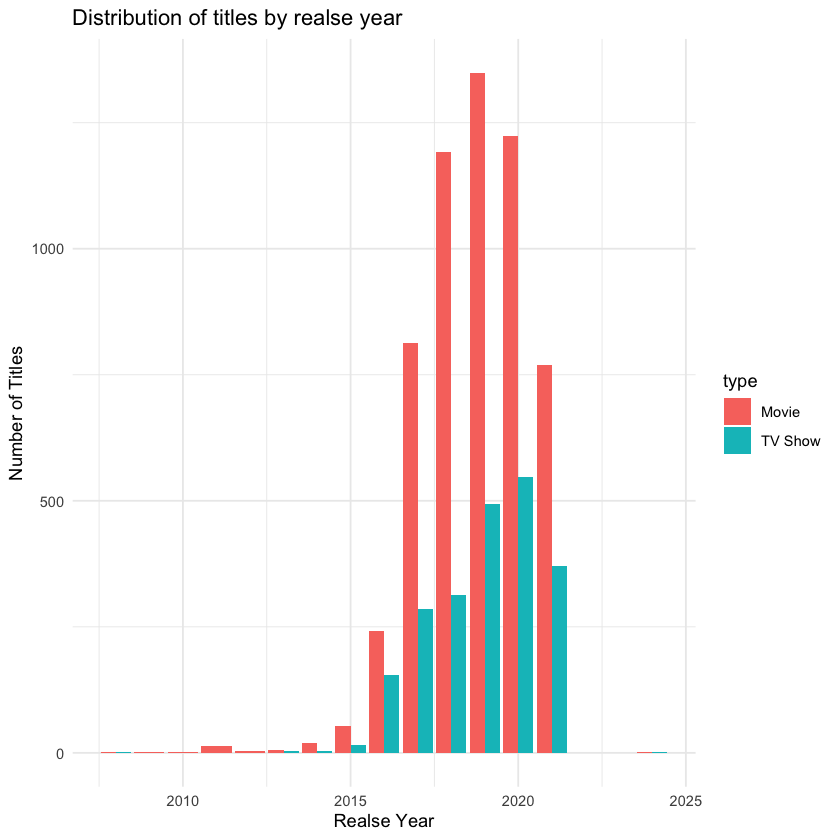

In [5]:
title_counts_year <- netflix %>%
						group_by(type, year_added) %>%
                  		summarise(title_count = n(), .groups = 'drop')

ggplot(title_counts_year , aes(x = year_added, y = title_count, fill = type)) +
	  geom_bar(stat = "identity", position = "dodge") +
	  labs(title = 'Distribution of titles by realse year',
		   x = 'Realse Year',
		   y = 'Number of Titles') +
	  theme_minimal()



#### Statistical Test: testing using Mann-Kendal trend test to formally assess whether there is a significant trend in the number of uploads over the years. 

![Uploading MK.png](MK.png)

The Mann Kendall Trend Test</b> (sometimes called the M-K test) is used to analyze data collected over time for consistently increasing or decreasing trends (monotonic) in Y values. A monotonic upward (downward) trend means that the variable consistently increases (decreases) through time, but the trend may or may not be linear.<br> 
    The MK test can be used in place of a parametric linear regression analysis, which can be used to test if the slope of the estimated linear regression line is different from zero. The regression analysis requires that the residuals from the fitted regression line be normally distributed; an assumption not required by the MK test, that is, the MK test is a non-parametric (distribution-free) test. <br>

  <h4>How the Test Works: </h4> <br>
* The <b>null hypothesis</b> for this test is that there is no monotonic trend in the series. <br>
* The <b>alternate hypothesis</b> is that a trend exists. This trend can be positive, negative, or non-null.

  <h4>Assumptions</h4> <br>
The following assumptions underlie the MK test: <br>
* When no trend is present, the measurements (observations or data) obtained over time are independent and identically distributed. The assumption of independence means that the observations are not serially correlated over time. <br>
* The observations obtained over time are representative of the true conditions at sampling times. <br>
* The sample collection, handling, and measurement methods provide unbiased and representative observations of the underlying populations over time. <br>
  </div>
</div>

In [6]:
movie_counts_year <- title_counts_year %>%
						filter(type == "Movie")

movie_trend_test <- mk.test(movie_counts_year$title_count)
print(movie_trend_test)


	Mann-Kendall trend test

data:  movie_counts_year$title_count
z = 3.0324, n = 15, p-value = 0.002426
alternative hypothesis: true S is not equal to 0
sample estimates:
          S        varS         tau 
 62.0000000 404.6666667   0.5990967 



#### Conclusion

**Significance of Trend**: The **p-value** of 0.002426 is much less than the typical significance level of 0.05, suggesting that there is a statistically significant trend in the data.

**Direction of Trend**: The **positive z-value and Kendall's tau** (0.5990967) indicate that the trend is upwards.

**Strength of Trend**: **Kendall's tau** value of approximately 0.599 suggests a moderately strong upward trend.

Because the **p-value** is less than 0.05, we **reject** the null hypothesis (𝐻0).

The alternative hypothesis (𝐻1), which suggests there is a **monotonic trend** in the data, is accepted.

In [7]:
series_counts_year <- title_counts_year %>%
						filter(type == "TV Show")

series_trend_test <- mk.test(series_counts_year$title_count)
print(series_trend_test)


	Mann-Kendall trend test

data:  series_counts_year$title_count
z = 1.998, n = 12, p-value = 0.04571
alternative hypothesis: true S is not equal to 0
sample estimates:
          S        varS         tau 
 30.0000000 210.6666667   0.4615931 



#### Conclusion

**Significance of Trend**: The **p-value** of 0.04571 is slightly less than the typical significance level of 0.05, suggesting that there is a statistically significant trend in the data, though it is just at the threshold.

**Direction of Trend**: The **positive z-value and Kendall's tau** (0.4615931) indicate that the trend is upwards.

**Strength of Trend**: **Kendall's tau** value of approximately 0.462 suggests a moderate upward trend.

Because the p-value is slightly below 0.05:

We **reject** the null hypothesis (𝐻0).

We **accept** the alternative hypothesis (𝐻1), indicating there is a monotonic trend in the data.

### 1.3 Plot a histogram of movie durations and TV show seasons.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0    58.0   107.0   108.6   156.0   312.0 

Skewness:  0.2555424 
Kurtosis:  2.451516

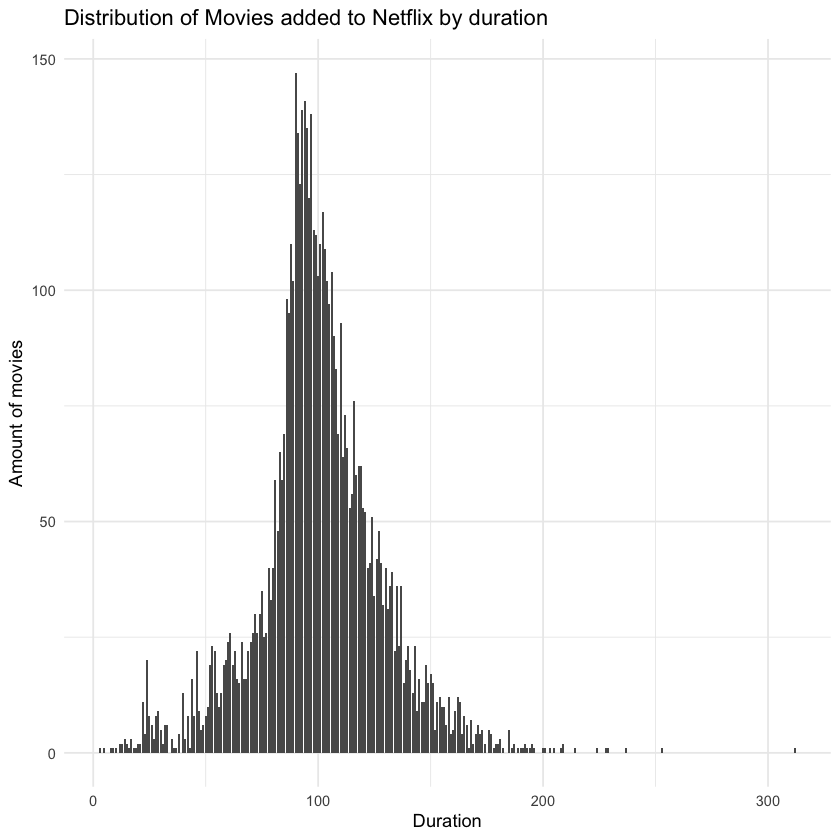

In [8]:
# `movies` and `series` - 2 `netflix`'s subdatasets made by extracting data after analyzing value of column `type`

movies <- netflix %>% 
	filter(type == 'Movie') %>% 
	group_by(duration) %>% 
	summarise(title_count = n())

# With `ggplot()` and `geom_histogram()` plotting a geometrical histogram of distribution of movies added to Netflix by duration using `movies`'s `duration` column
ggplot(movies, aes(x = duration, y = title_count)) +
  geom_bar(stat = "identity") +
  labs(title = 'Distribution of Movies added to Netflix by duration',
       x = 'Duration',
       y = 'Amount of movies') +
  theme_minimal()

# Summarizing `duration` column of both datasets
summary(movies$duration)

# calculating skewness and kurtosis
cat("Skewness: ", skewness(movies$duration), "\n")
cat("Kurtosis: ", kurtosis(movies$duration))

#### Observations from the Histogram:

1. Distribution Shape:

The distribution of movie durations appears to be **unimodal**, with a single peak around the 100-minute mark.

It shows a fairly **symmetrical shape** around the mean, suggesting a distribution that **could be compared** to a normal distribution.

2. Central Tendency:

The **mean** and **median** values (both around 107-108 minutes) are very close, indicating that the distribution is **roughly symmetric**.

3. Spread:

The **range** of the data is quite **large**, with durations ranging from 3 minutes to 312 minutes.

Most movies have durations concentrated between 50 and 150 minutes, as suggested by the interquartile range (IQR).

3. Outliers:

There are a few outliers on the high end of the duration scale, as seen by the long tail extending beyond 200 minutes.

5. Comparison to a Normal Distribution:
* Symmetry:

The histogram shows a roughly symmetric distribution, similar to a normal distribution.

* Mean and Median:

In a normal distribution, the mean and median are equal. Here, they are very close (mean = 108.6, median = 107.0), which is a good indication of normality.

* Peak and Spread:

The peak around the mean and the spread of data points decreasing as you move away from the mean is characteristic of a normal distribution.

* Skewness and Kurtosis:

-- **Skewness**: 0.256

Skewness close to 0 indicates a relatively symmetric distribution. A skewness of 0.256 suggests a slight positive skew, but this is not substantial.

-- **Kurtosis**: 2.452

For a normal distribution, the kurtosis is 3. A kurtosis of 2.452 indicates a distribution that is slightly platykurtic, meaning it has lighter tails and a flatter peak compared to a normal distribution.



### Visual Comparison:

To visually compare the distribution of movie durations to a normal distribution, you could create a **Q-Q plot**. This plot will help you see how the quantiles of your data compare to the quantiles of a normal distribution.

[1] 197 196

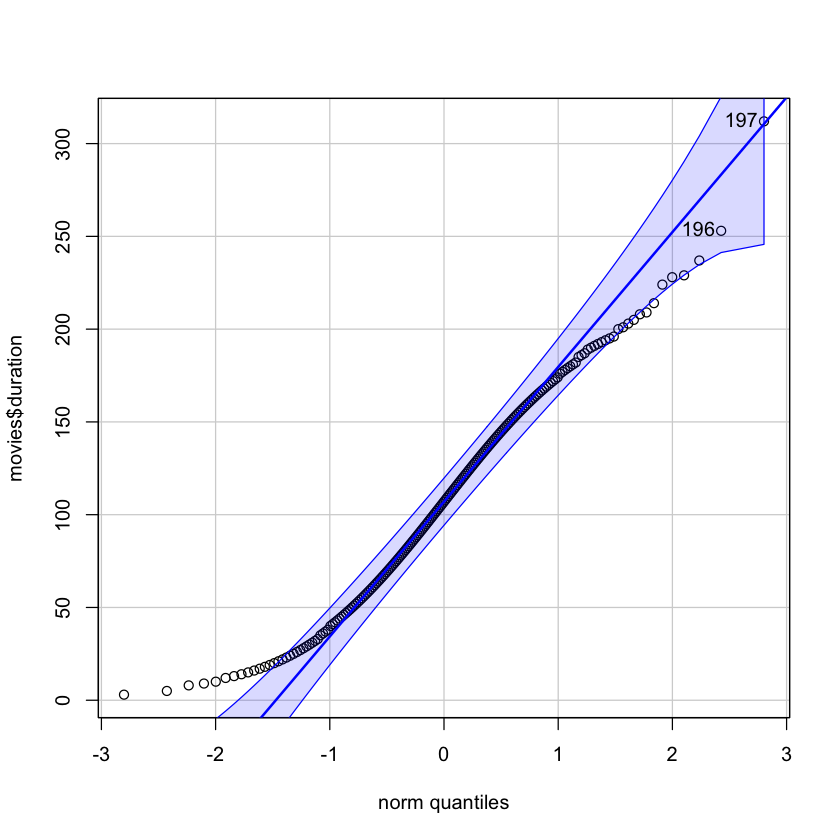

In [9]:
qqPlot(movies$duration)

#### Conclusions: 

1. Central Data Points:

The central part of the data (around the mean) **follows the reference** line fairly well. This suggests that the central portion of the duration data is **approximately normally distributed**.

2. Tails of the Distribution:

The left tail (**lower quantiles**) shows some data points that fall **below** the line, indicating that the lower durations are **less** than what would be expected in a normal distribution.

The right tail (**higher quantiles**) shows data points that fall **above** the line, indicating that the higher durations are **greater** than what would be expected in a normal distribution.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     4.5     8.0     8.2    11.5    17.0 

Skewness:  0.2109498 
Kurtosis:  2.036083

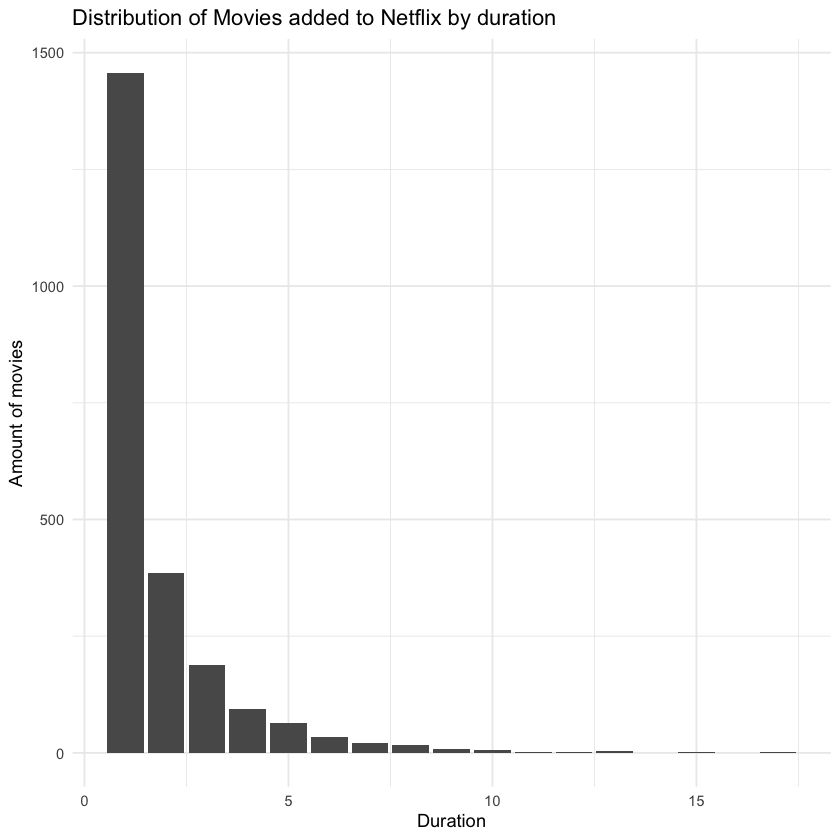

In [10]:
series <- netflix %>%
	filter(type == 'TV Show') %>% 
	group_by(duration) %>% 
	summarise(title_count = n())

ggplot(series, aes(x = duration, y = title_count)) +
  geom_bar(stat = "identity") +
  labs(title = 'Distribution of Movies added to Netflix by duration',
       x = 'Duration',
       y = 'Amount of movies') +
  theme_minimal()

summary(series$duration)
cat("Skewness: ", skewness(series$duration), "\n")
cat("Kurtosis: ", kurtosis(series$duration))

#### Observations from the Histogram:

1. Shape of Distribution:

The histogram shows a clear **right-skewed** (positively skewed) distribution. This is evidenced by the long tail on the right side of the histogram, where there are fewer series with bigger count of seasons.

2. Central tendancy:

A significant concentration of movies is **clustered at the lower** end of the duration axis. The highest bar is at the shortest duration, indicating that most series have less number of seasons.

3. Spread:

As the duration increases, the frequency of series sharply decreases. There are fewer series with medium to long durations.

4. Comparison with Normal Distribution:

* Symmetry:

A normal distribution is **symmetrical around its mean**. However, the histogram is not symmetrical; it is skewed to the right. This indicates that series number of seasons do not follow a normal distribution.

* Peak (Modality):

A normal distribution has a **single peak at the mean value**. The histogram also has a single peak, but it is skewed towards the lower end of the duration axis, unlike the central peak of a normal distribution.

* Tails:

In a normal distribution, the **tails** on both sides of the peak **extend infinitely and symmetrically**. In the histogram, the left tail is very short, while the right tail is extended, further indicating a right-skewed distribution.

* Mean, Median, and Mode:

In a normal distribution, the **mean, median, and mode are all equal** and located **at the center** of the distribution. For the histogram, these three measures of central tendency will differ, with the mode being lower than the median, and the median lower than the mean, reflecting the positive skewness.

* Skewness and Kurtosis:

-- **Skewness**: (0.2109) 

This indicates that the distribution is slightly skewed to the right, meaning there are some relatively higher values.

-- **Kurtosis**:(2.0368)

This shows light-tailed characteristics relative to a normal distribution. While a normal distribution has a kurtosis of 3, the kurtosis here is slightly lower, indicating fewer outliers than a normal distribution.

[1] 15  1

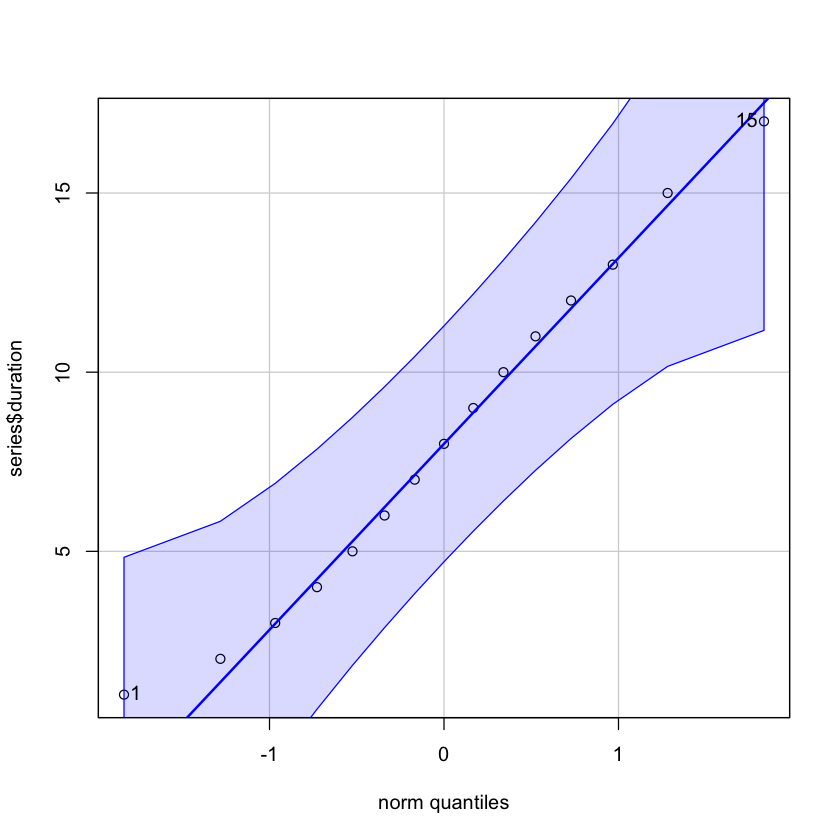

In [11]:
qqPlot(series$duration)

#### Conclusions:

1. Central Data:

Around the center of the plot, the points are closer to the line but still exhibit some deviation. This indicates that the central part of the distribution is somewhat closer to normal but still not perfectly aligned.

2. Tail Behavior:

**Left Tail**: Points on the lower end (left tail) fall below the line, indicating that the actual data have fewer extremely low values than expected under normality.

**Right Tail**: Points on the higher end (right tail) fall above the line, suggesting that there are more extremely high values than expected in a normal distribution.


## 2. Genre Analysis:
### 2.1 Identify the most popular genres on Netflix.

n
<int>
12331


n
<int>
5268


# A tibble: 23 x 3
   listed_in                genre_count props
   <chr>                          <int> <chr>
 1 International Movies            2543 20 % 
 2 Dramas                          2316 18 % 
 3 Comedies                        1580 12 % 
 4 Action & Adventure               817 6 %  
 5 Documentaries                    794 6 %  
 6 Independent Movies               745 6 %  
 7 Romantic Movies                  588 4 %  
 8 Thrillers                        549 4 %  
 9 Children & Family Movies         535 4 %  
10 Horror Movies                    340 2 %  
# i 13 more rows
# A tibble: 25 x 3
   listed_in              genre_count props
   <chr>                        <int> <chr>
 1 International TV Shows        1127 21 % 
 2 TV Dramas                      663 12 % 
 3 TV Comedies                    500 9 %  
 4 Crime TV Shows                 421 7 %  
 5 Kids' TV                       369 7 %  
 6 Docuseries                     330 6 %  
 7 Romantic TV Shows              299 5 %

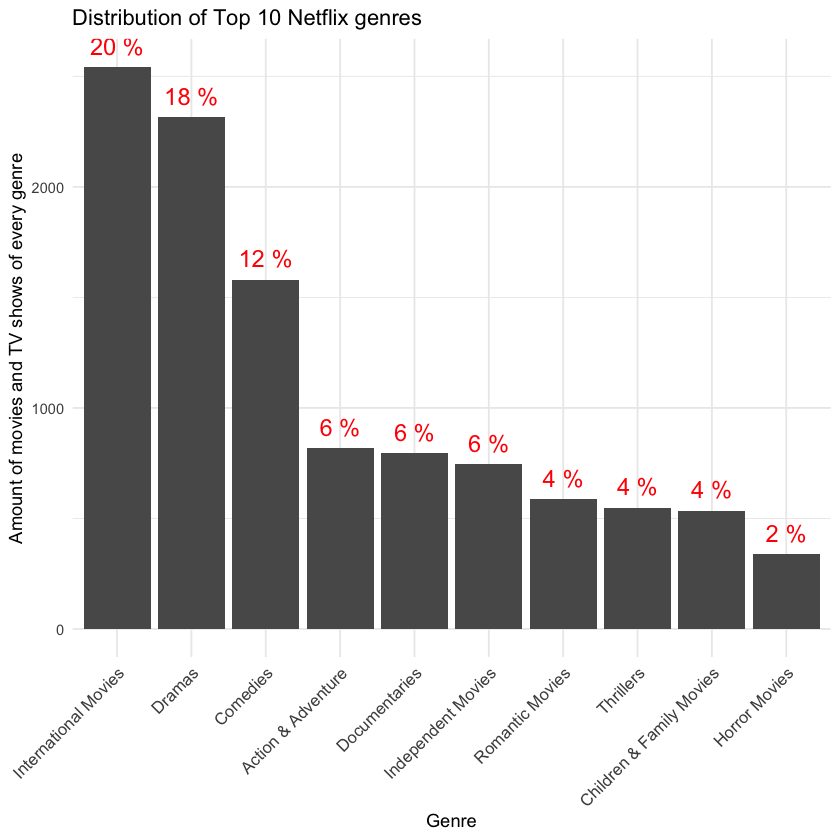

In [12]:
netflix_genres <- netflix %>%
     separate_rows(listed_in, sep = ",") %>%
     mutate(listed_in = trimws(listed_in))

sum_movie_genres <- netflix_genres %>%
                         filter(type == "Movie") %>%
                         count()

sum_series_genres <- netflix_genres %>%
                         filter(type == "TV Show") %>%
                         count()

sum_movie_genres
sum_series_genres

movie_genre_counts <- netflix_genres %>%
                    filter(type == "Movie") %>% 
                    group_by(listed_in) %>%
                    summarise(genre_count = n(),
                              props = paste(trunc(genre_count / sum_movie_genres * 100, prec = 4), "%"),
                              .groups = 'drop') %>%
                    arrange(desc(genre_count)) %>%
                    print()

series_genre_counts <- netflix_genres %>%
                    filter(type == "TV Show") %>% 
                    group_by(listed_in) %>%
                    summarise(genre_count = n(),
                              props = paste(trunc(genre_count / sum_series_genres * 100, prec = 4), "%"),
                              .groups = 'drop') %>%
                    arrange(desc(genre_count)) %>%
                    print()

ggplot(movie_genre_counts %>% top_n(10, genre_count), 
          aes(x = reorder(listed_in, -genre_count), y = genre_count)) +
     geom_text(aes(label = props), size = 5, vjust = -0.75, color = 'red') +
     geom_bar(stat = 'identity') +
     labs(title = "Distribution of Top 10 Netflix genres",
          x = "Genre",
          y = "Amount of movies and TV shows of every genre") +
     theme_minimal() +
     theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))

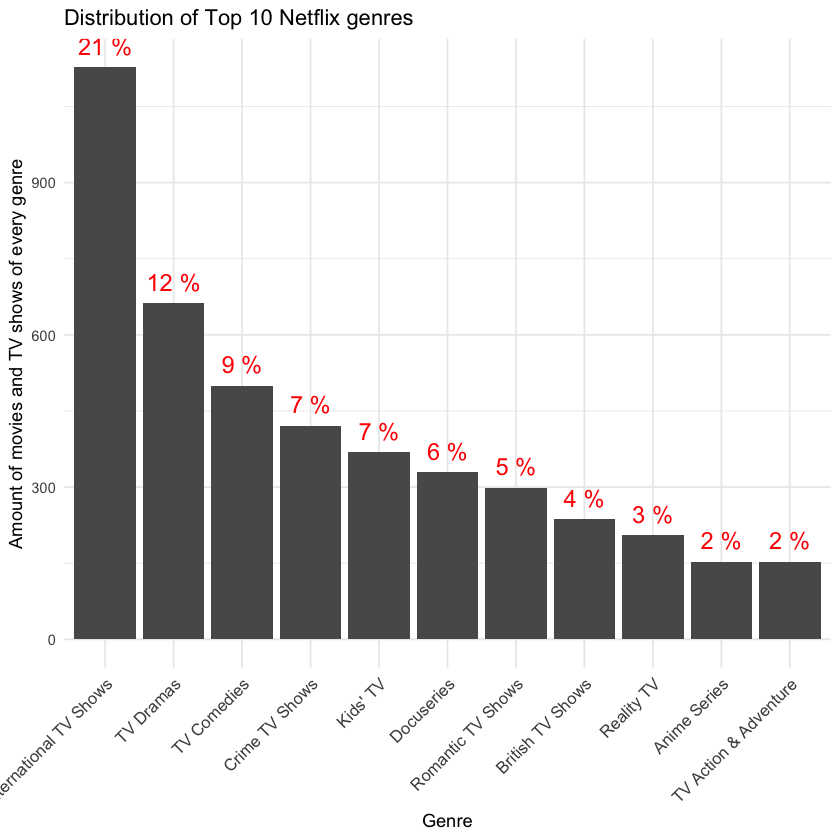

In [13]:
ggplot(series_genre_counts %>% top_n(10, genre_count), 
          aes(x = reorder(listed_in, -genre_count), y = genre_count)) +
     geom_bar(stat = 'identity') +
     geom_text(aes(label = props), size = 5, vjust = -0.75, color = 'red') +
     labs(title = "Distribution of Top 10 Netflix genres",
          x = "Genre",
          y = "Amount of movies and TV shows of every genre") +
     theme_minimal() +
     theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10))


### 2.2 Analyze the distribution of genres across different countries.

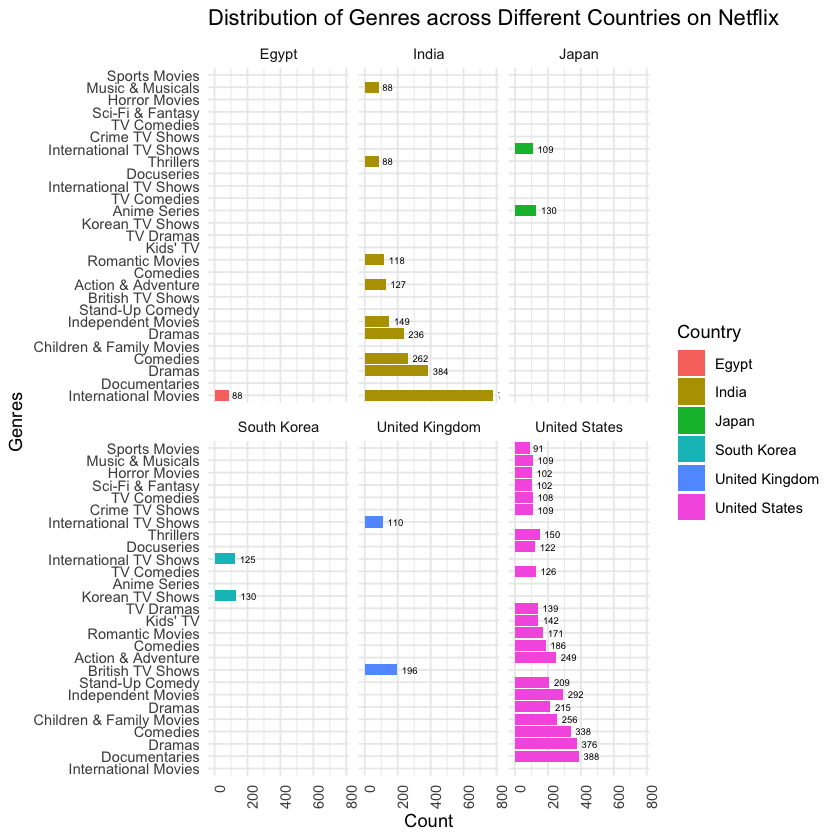

In [14]:
netflix_genres_countries <- netflix %>%
            mutate(country = ifelse(country == "", "Unknown", country)) %>%
            separate_rows(listed_in, sep = ",") %>%
			filter(!grepl(",", country)) %>%
            group_by(country, listed_in) %>%
            summarise(genre_count = n(), .groups = 'drop')



ggplot(netflix_genres_countries %>% top_n(35, genre_count), 
       aes(x = reorder(listed_in, -genre_count), 
           y = genre_count, 
           fill = country)
       ) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = genre_count), size = 2, hjust = -0.3) +
  coord_flip() +
  theme_minimal() +
  labs(title = "Distribution of Genres across Different Countries on Netflix",
       x = "Genres",
       y = "Count",
       fill = "Country") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~ country)

#### Conclusions:

1. **Genre Popularity**:

* International Movies are popular across all featured countries except Japan, where Dramas take the lead. This suggests a strong market for international content in these regions.

* Comedies, Documentaries, and Dramas are consistently present in the top genres across countries, indicating their broad appeal.

2. **Market Differences**:

Each country has its unique preferences:
- In Egypt and India, International Movies dominate.
- In Japan, Dramas are the most common genre.
- South Korea shows a high count for International TV Shows, suggesting a preference for serialized content.
- Both United Kingdom and United States have a strong presence of International Movies, closely followed by Dramas.

These differences highlight the need for tailored content strategies in each country.

3. Content Strategy:

Netflix can use this data to inform its content acquisition or production strategy. For example, investing in more International Movies for Egypt and India, and emphasizing Dramas in Japan.

4. Potential Gaps:
- Lower counts in certain genres (e.g., Sports Movies, Music & Musicals) may indicate areas for growth or investment.
- For instance, if there’s a demand for Sports Movies, Netflix could explore creating or acquiring more content in that genre.

5. Cultural Influence:

- The popularity of certain genres might reflect cultural preferences or trends within those countries.
- Understanding these cultural nuances can help content creators and marketers tailor their offerings.

6. Comparative Analysis:
 
Comparing genre counts between countries can identify markets with higher overall demand or specific genre preferences.

7. Subscription Drivers:

Knowing what drives subscriptions in different regions (i.e., preferred genres) helps Netflix maintain or increase its subscriber base.


## 3. Rating Analysis:
### 3.1 Determine the distribution of ratings (e.g., PG-13, TV-MA) in the dataset.

type,rating,n
<chr>,<chr>,<int>
Movie,A,1
TV Show,R,1
TV Show,TV-Y7-FV,1
Movie,NC-17,3
Movie,UR,3
Movie,TV-Y7-FV,4
TV Show,NR,5
Movie,G,41
Movie,NR,75


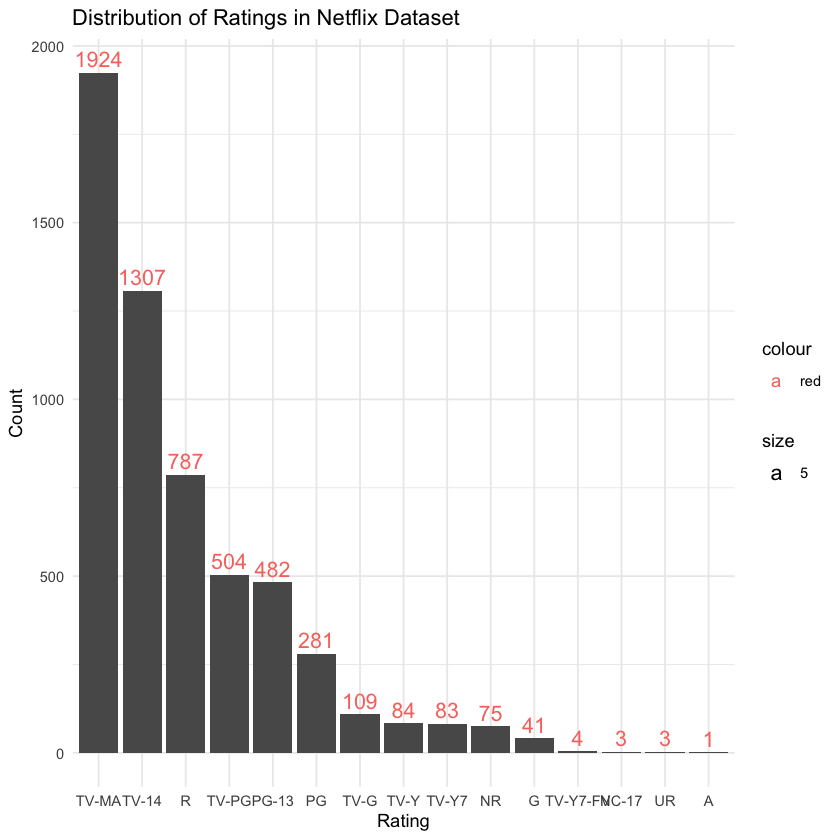

In [15]:
rating_distribution <- netflix %>%
			group_by(type) %>%
                     count(rating) %>%
                     arrange(n)
rating_distribution


ggplot(rating_distribution %>% filter(type == "Movie"), aes(x = reorder(rating, -n), y = n)) +
       geom_bar(stat = 'identity') +
       geom_text(aes(label = n, size = 5, vjust = -0.4, color = 'red')) +
       labs(title = "Distribution of Ratings in Netflix Dataset",
              x = "Rating",
              y = "Count") +
       theme_minimal()

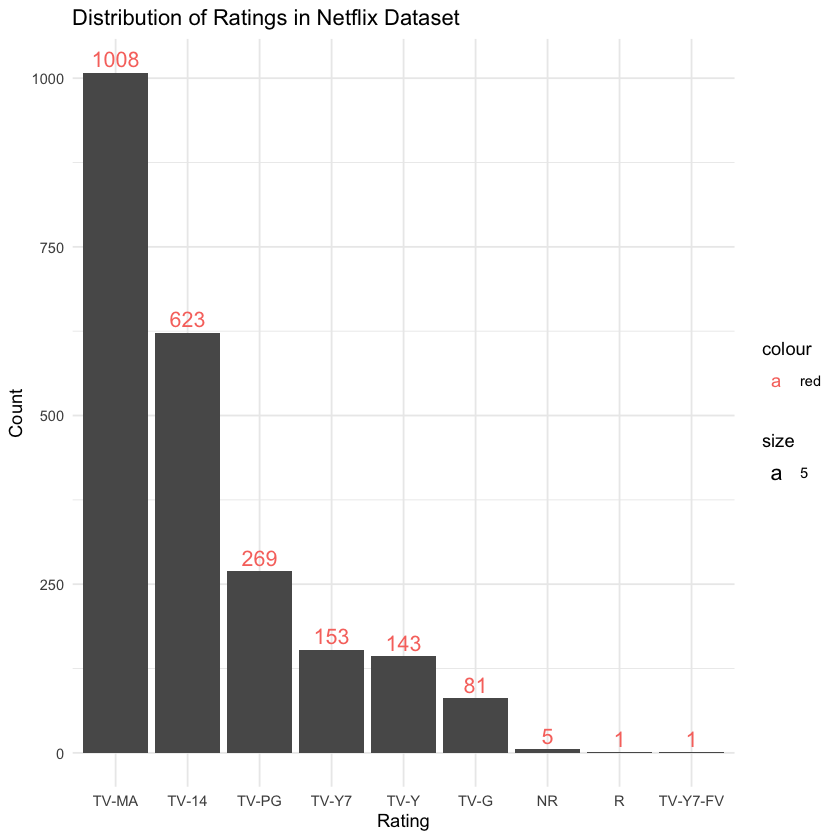

In [16]:

ggplot(rating_distribution %>% filter(type == "TV Show"), aes(x = reorder(rating, -n), y = n)) +
       geom_bar(stat = 'identity') +
       geom_text(aes(label = n, size = 5, vjust = -0.4, color = 'red')) +
       labs(title = "Distribution of Ratings in Netflix Dataset",
              x = "Rating",
              y = "Count") +
       theme_minimal()

### 3.2 Explore the relationship between ratings and genres

rating,listed_in,genre_rating_count,props
<chr>,<chr>,<int>,<chr>
TV-MA,Stand-Up Comedy,258,3 %
TV-MA,"Dramas, International Movies",144,1 %
TV-MA,"Dramas, Independent Movies, International Movies",138,1 %
TV-14,"Comedies, Dramas, International Movies",128,1 %
TV-14,"Dramas, International Movies",125,1 %
TV-MA,Documentaries,108,1 %
PG,"Children & Family Movies, Comedies",98,1 %
TV-Y,Kids' TV,94,1 %
TV-14,Documentaries,93,1 %


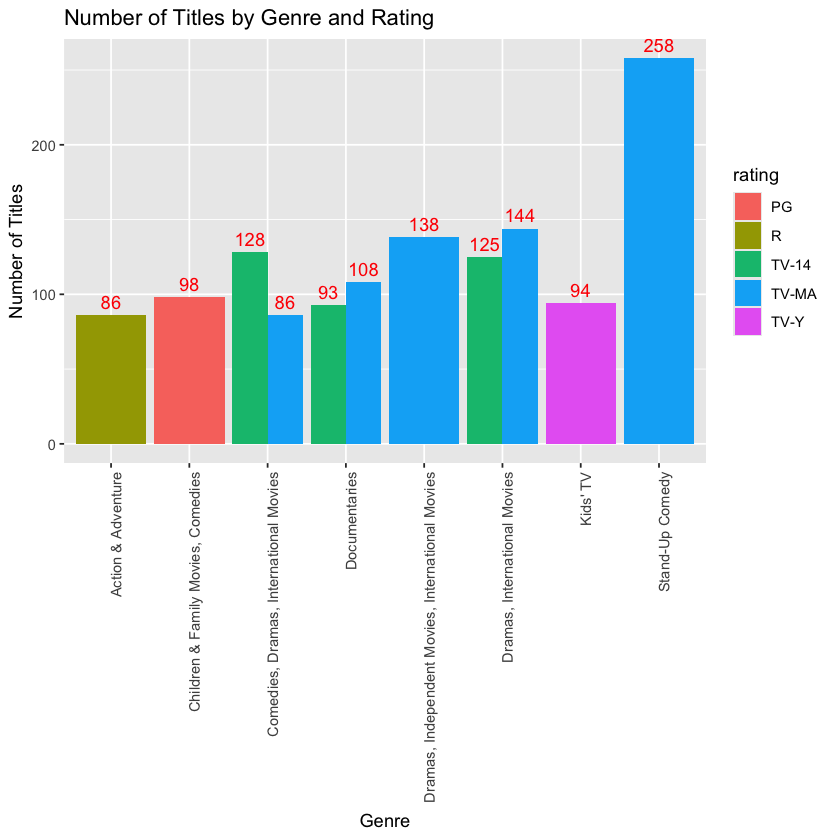

In [17]:
netflix_genres_ratings <- netflix %>%
                              group_by(rating, listed_in) %>%
                              summarise(genre_rating_count = n(),
                                        props = paste(trunc(genre_rating_count / nrow(netflix) * 100, prec = 4), "%"), 
                                        .groups = 'drop')
netflix_genres_ratings %>% arrange(-genre_rating_count)


ggplot(netflix_genres_ratings %>% top_n(10, genre_rating_count), aes(x = listed_in, y = genre_rating_count, fill = rating)) +
     geom_bar(stat = "identity", position = "dodge") +
     geom_text(aes(label = genre_rating_count), 
               position = position_dodge(width = .9),
               color = 'red',
               vjust = -0.5) +
     labs(title = "Number of Titles by Genre and Rating",
          x = "Genre",
          y = "Number of Titles") +
     theme(axis.text.x = element_text(angle = 90, hjust = 1))

#### Analysis of Variance(ANOVA) helps determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

- `duration ~ rating`: This formula specifies the model, where duration is the dependent variable and rating is the independent variable.

#### Statistical Explanation
- `Null Hypothesis (H0)`: The null hypothesis for ANOVA is that all group means are equal. In this context, it means that the average duration of Netflix titles is the same across all rating categories.

- `Alternative Hypothesis (H1)`: The alternative hypothesis is that at least one group mean is different from the others. In this context, it means that the average duration of Netflix titles differs for at least one rating category compared to others.

#### The summary of the ANOVA results typically includes:
1. **Df (Degrees of Freedom)**:

    1.1 **Between Groups** (rating): Number of rating categories minus one.

    1.2 **Within Groups** (Residuals): Total number of observations minus the number of rating categories.


2. **Sum Sq (Sum of Squares)**:

    2.1 **Between Groups**: The variability in duration explained by differences between rating categories.

    2.2 **Within Groups (Residuals)**: The variability in duration within rating categories.


3. **Mean Sq (Mean Square)**:

    3.1 **Between Groups**: Sum of squares between groups divided by its degrees of freedom.

    3.2 **Within Groups (Residuals)**: Sum of squares within groups divided by its degrees of freedom.


4. **F Value**: The ratio of the mean square between groups to the mean square within groups. 

It is used to determine whether the observed variances are significantly different.


5. **Pr(>F) (p-value)**: The probability of observing an F value as extreme as, or more extreme than, the value computed if the null hypothesis were true. 

A small p-value (typically `< 0.05`) indicates strong evidence against the null hypothesis, suggesting that there are significant differences between group means.

#### Interpretation

##### **Significant F-test** (`Small p-value`): 

If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis. 

This means there is sufficient evidence to conclude that the mean duration of Netflix titles differs across rating categories.

##### **Non-Significant F-test** (`Large p-value`): 

If the p-value is greater than the significance level, we fail to reject the null hypothesis. 

This means there is not enough evidence to conclude that the mean duration of Netflix titles differs across rating categories.

              Df   Sum Sq Mean Sq F value Pr(>F)    
rating        14  3392962  242354   115.7 <2e-16 ***
Residuals   7957 16660604    2094                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

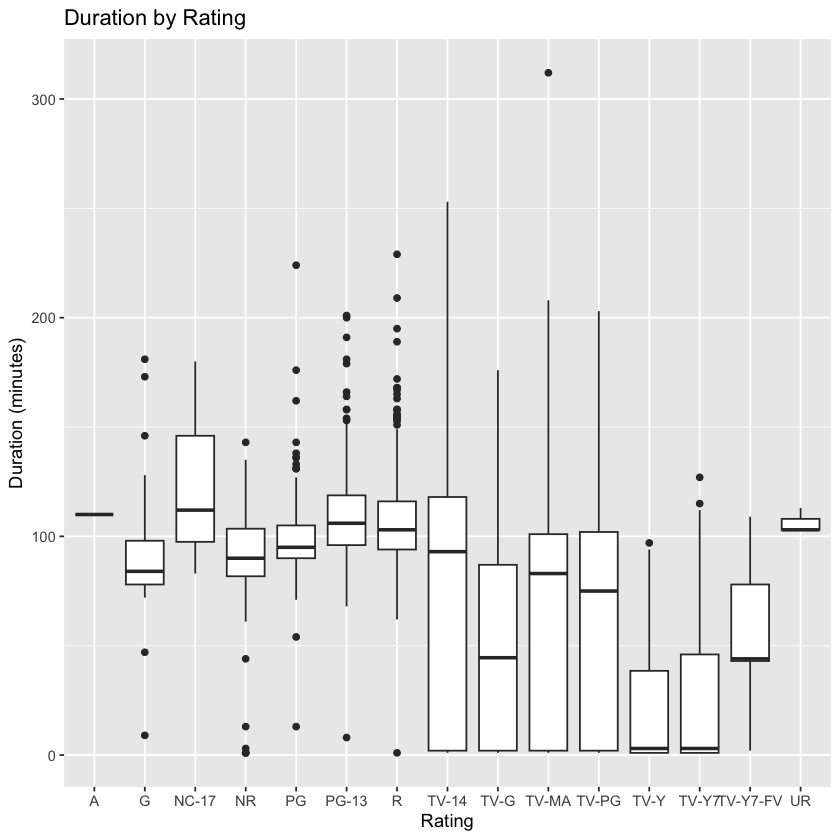

In [18]:
# ANOVA - compare duration across ratings
duration_vs_releaseyear_anova <- aov(duration ~ rating, data = netflix)
summary(duration_vs_releaseyear_anova)

# With `ggplot()` and `geom_boxplot()` plotting a boxplot of duration by rating using `netflix`'s `rating` and `duration` columns
ggplot(netflix, aes(x = rating, y = duration)) +
  geom_boxplot() +
  labs(title = "Duration by Rating", x = "Rating", y = "Duration (minutes)")

#### ANOVA Test

**Degrees of Freedom (Df)**:
- The “Df” column represents the degrees of freedom.
- For the “rating” factor, there are 14 degrees of freedom (associated with the different levels of the rating variable).
- For the “Residuals,” it indicates the degrees of freedom related to the error term (within-group variability).

**Sum of Squares (Sum Sq)**:
- The “Sum Sq” column represents the sum of squares.
- For “rating,” the sum of squares is 3,392,962.
- This value quantifies the variability explained by the rating factor.

**Mean Square (Mean Sq)**:
- The “Mean Sq” column represents the mean sum of squares.
- It is calculated by dividing the sum of squares by the degrees of freedom.
- For “rating,” the mean square is 24,235.4.

**F Value**:
- The F value (115.7) is the test statistic obtained from the ANOVA.
- It compares the variability between group means (explained by the rating factor) to the variability within each group (residuals).
- A large F value suggests significant differences among group means.

**p-value (Pr(>F))**:
- The p-value is less than 2e-16 (indicated by three asterisks).
- This extremely small p-value suggests strong evidence against the null hypothesis.
- We reject the null hypothesis and conclude that there are significant differences in means across the rating levels.

**Significance Codes**:
- The significance codes indicate the level of significance.
- Three asterisks (***) denote highly significant results (p < 0.001).

**Interpretation**:

- The ANOVA test indicates that the “rating” factor has a significant impact on the dependent variable (whatever is being measured).
- The variability in movie durations is associated with the different rating levels (G, PG, PG-13, R, Un).
- Overall, this analysis provides evidence that movie durations vary significantly based on their assigned ratings.

#### Box-Plot Conclusions:

1. **Median Duration**:
We can compare the medians to see if certain ratings tend to have longer or shorter movies.

For example, if the median duration for “R” rated movies is significantly different from that of “PG-13” rated movies, it suggests a potential difference in movie lengths.

3. Outliers:
Any individual points beyond the whiskers are considered outliers.

4. ANOVA Summary Table:
* The “Df” column represents degrees of freedom.
-- rating: 14
-- Residuals: 7957

* “Sum Sq” refers to sum of squares, and “Mean Sq” is the mean sum of squares.
-- rating: 3,392,962
-- Residuals: 16,660,604

* The “F value” indicates the test statistic for comparing group means.
-- rating: 242,354
-- Residuals: 2,094

* The “Pr(>F)” value represents the p-value, which assesses the significance of differences between groups.
-- Pr(>F): <2e-16

* The p-value is very small (less than 2e-16), indicating significant differences among movie ratings.
-- F value: 115.7

* Significance Codes:
-- The significance codes at the bottom of the table denote levels of significance.
-- The three asterisks (***) indicate extremely high significance (p < 0.001).

**Significance of the Rating Variable**:

The **p-value (Pr(>F))** associated with the rating variable is **extremely small** (< 2e-16), which is much less than the typical significance level (e.g., 0.05 or 0.01). 

This indicates that the rating variable has a statistically significant effect on the response variable.

**Magnitude of the F Statistic**:

The **F value** is 115.7, which is a very high value. This high F value suggests that the variance explained by the rating variable is much larger than the variance unexplained (residual variance). 

In other words, the rating variable explains a significant portion of the variability in the response variable.

**Model Fit**:

The **mean square** for the rating variable (242,354) is substantially larger than the mean square of the residuals (2,094). 

This further supports that the model including the rating variable fits the data significantly better than a model without it.

**Degrees of Freedom**:

There are 14 degrees of freedom associated with the rating variable, which indicates the number of levels or categories within the rating variable.

The residuals have 7,957 degrees of freedom, indicating a large sample size (since degrees of freedom for residuals = total number of observations - number of parameters estimated).

### 3.3 Analyze the distribution of ratings by release year.

year_added,rating,rating_year_added_count
<int>,<chr>,<int>
2008,TV-MA,2
2009,TV-MA,2
2010,NR,1
2011,TV-14,5
2011,TV-MA,3
2011,TV-PG,5
2012,PG,1
2012,R,1
2012,TV-PG,1


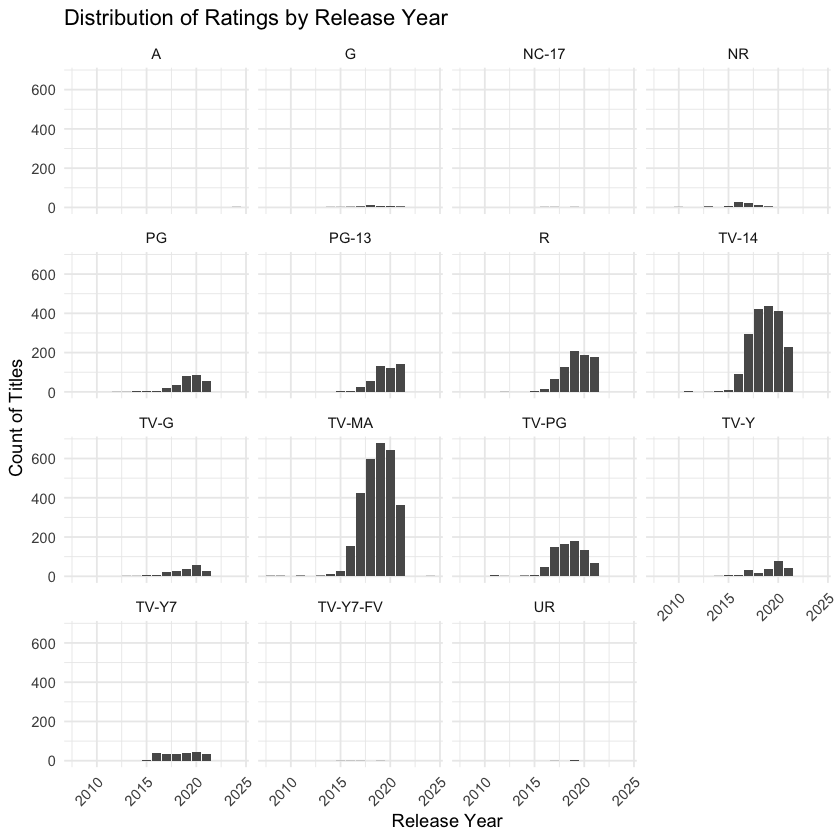

In [19]:
     netflix_ratings_release_years <- netflix %>%
                                        group_by(year_added, rating) %>%
                                        summarise(rating_year_added_count = n(), .groups = 'drop')
netflix_ratings_release_years


ggplot(netflix_ratings_release_years, aes(x = year_added, y = rating_year_added_count)) +
     geom_bar(stat = "identity") +
     labs(title = "Distribution of Ratings by Release Year",
          x = "Release Year",
          y = "Count of Titles",
          fill = "Rating") +
     theme_minimal() +
     theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
     facet_wrap(~ rating)

**Content Diversity**:

- The plot shows a wide range of ratings, including G, PG, PG-13, R, NC-17, TV-Y, TV-G, TV-PG, TV-14, TV-MA, TV-Y7-FV, and UR.
- Netflix aims to cater to diverse audiences by offering content suitable for various age groups and preferences.

**Recent Trends**:
- There is a noticeable increase in titles rated TV-MA (Mature Audiences) in recent years.
This suggests that Netflix may be focusing more on content for adults, possibly due to changing viewer demographics or demand.

**Limited NC-17 and UR Content**:
- The low count of titles with ratings like NC-17 (No Children Under 17 Admitted) and UR (Unrated) indicates that such content is less common.
- Netflix may prioritize other rating categories over these.

**Viewer Preferences**:
- The distribution reflects viewer preferences over time.
- For example, if there’s a surge in TV-14 content, it could indicate popularity among teenagers and young adults.

**Content Strategy**:
- Netflix’s content strategy likely considers market trends, audience demographics, and licensing agreements.
- The balance between family-friendly and mature content impacts subscriber retention and acquisition.

**Competition and Originals**:
- Netflix competes with other streaming services, so its content mix is strategic.
- Original content (e.g., TV-MA series) helps retain subscribers and attract new ones.

**Viewer Behavior**:
- Viewer behavior (e.g., binge-watching) influences content decisions.
- High-rated shows drive engagement and retention.

## 4 Country Analysis:
### 4.1 Identify the top countries producing content available on Netflix.

country,type,count
<chr>,<chr>,<int>
United States,Movie,2750
India,Movie,962
United States,TV Show,938
United Kingdom,Movie,534
Canada,Movie,319
France,Movie,303
United Kingdom,TV Show,272
Japan,TV Show,198
Germany,Movie,182


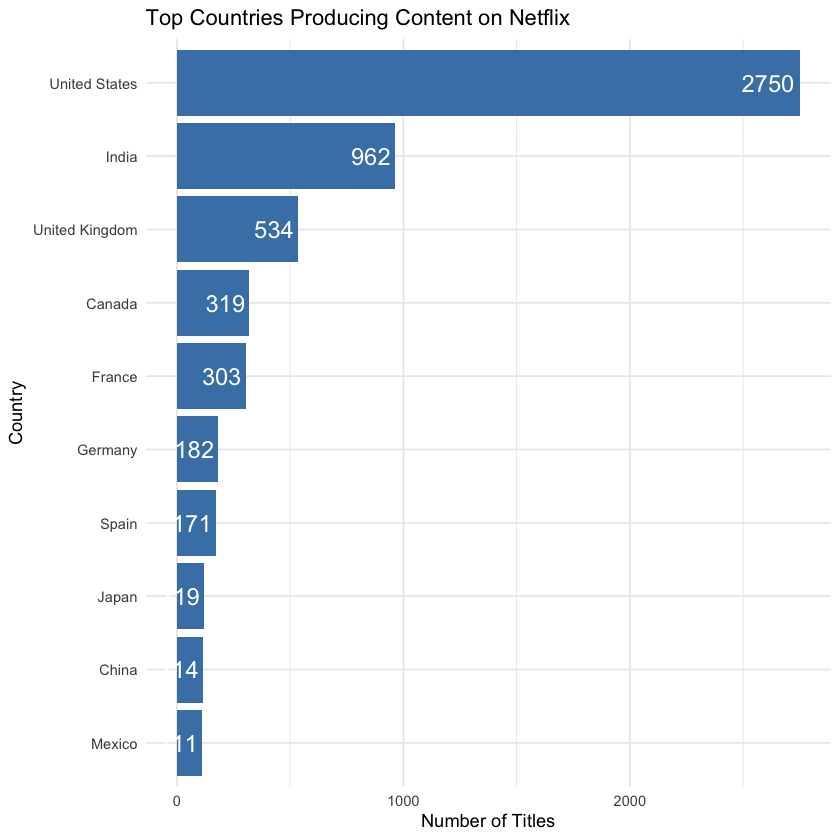

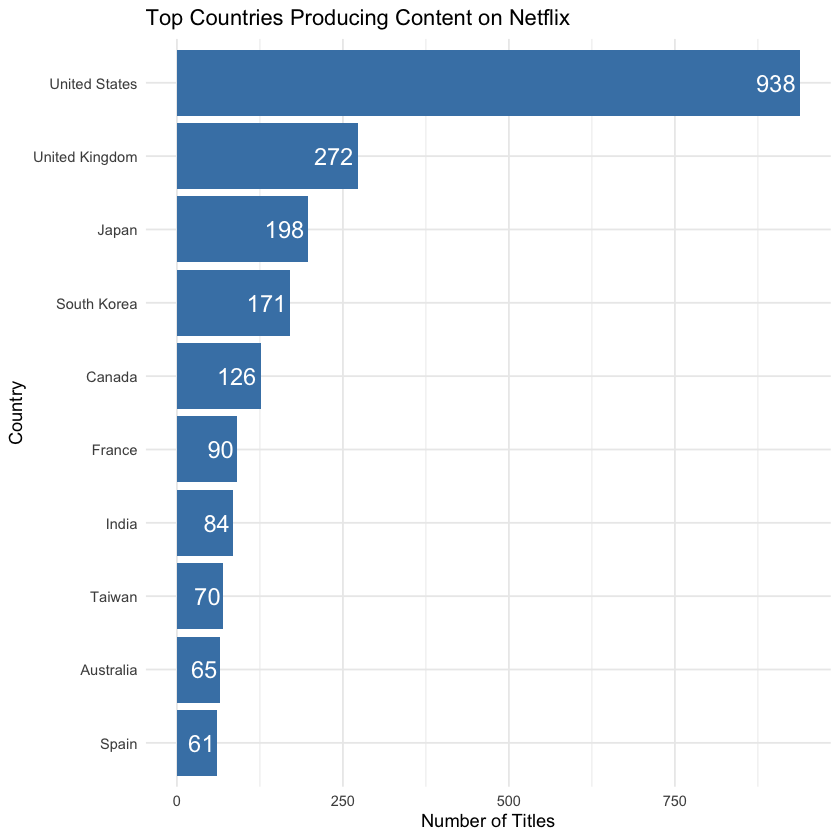

In [20]:
netflix_countries <- netflix %>%
  select(show_id, country, type) %>%
  separate_rows(country, sep = ",") %>%
  mutate(country = trimws(country))

netflix_countries <- netflix_countries %>%
                        filter(country != "")


country_count <- netflix_countries %>%
  group_by(country, type) %>%
  summarize(count = n(), .groups = 'drop') %>%
  arrange(desc(count))

head(country_count, 10)

movie_top_countries <- country_count %>% filter(type == "Movie") %>% top_n(10, wt = count)
series_top_countries <- country_count %>% filter(type == "TV Show") %>% top_n(10, wt = count)

ggplot(movie_top_countries, aes(x = reorder(country, count), y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = count), size = 5, hjust = 1.1, color = 'white') +
  coord_flip() +
  labs(title = "Top Countries Producing Content on Netflix",
        x = "Country",
        y = "Number of Titles") +
  theme_minimal()

ggplot(series_top_countries, aes(x = reorder(country, count), y = count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = count), size = 5, hjust = 1.1, color = 'white') +
  coord_flip() +
  labs(title = "Top Countries Producing Content on Netflix",
        x = "Country",
        y = "Number of Titles") +
  theme_minimal()

## Bibliography:

#### Mann Kendal Test:

https://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm

https://www.statisticshowto.com/mann-kendall-trend-test/

#### ANOVA Test:
https://www.investopedia.com/terms/a/anova.asp